In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.job import job_monitor
provider = IBMQ.load_account()

/tmp/ipykernel_81/2779030276.py:10: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


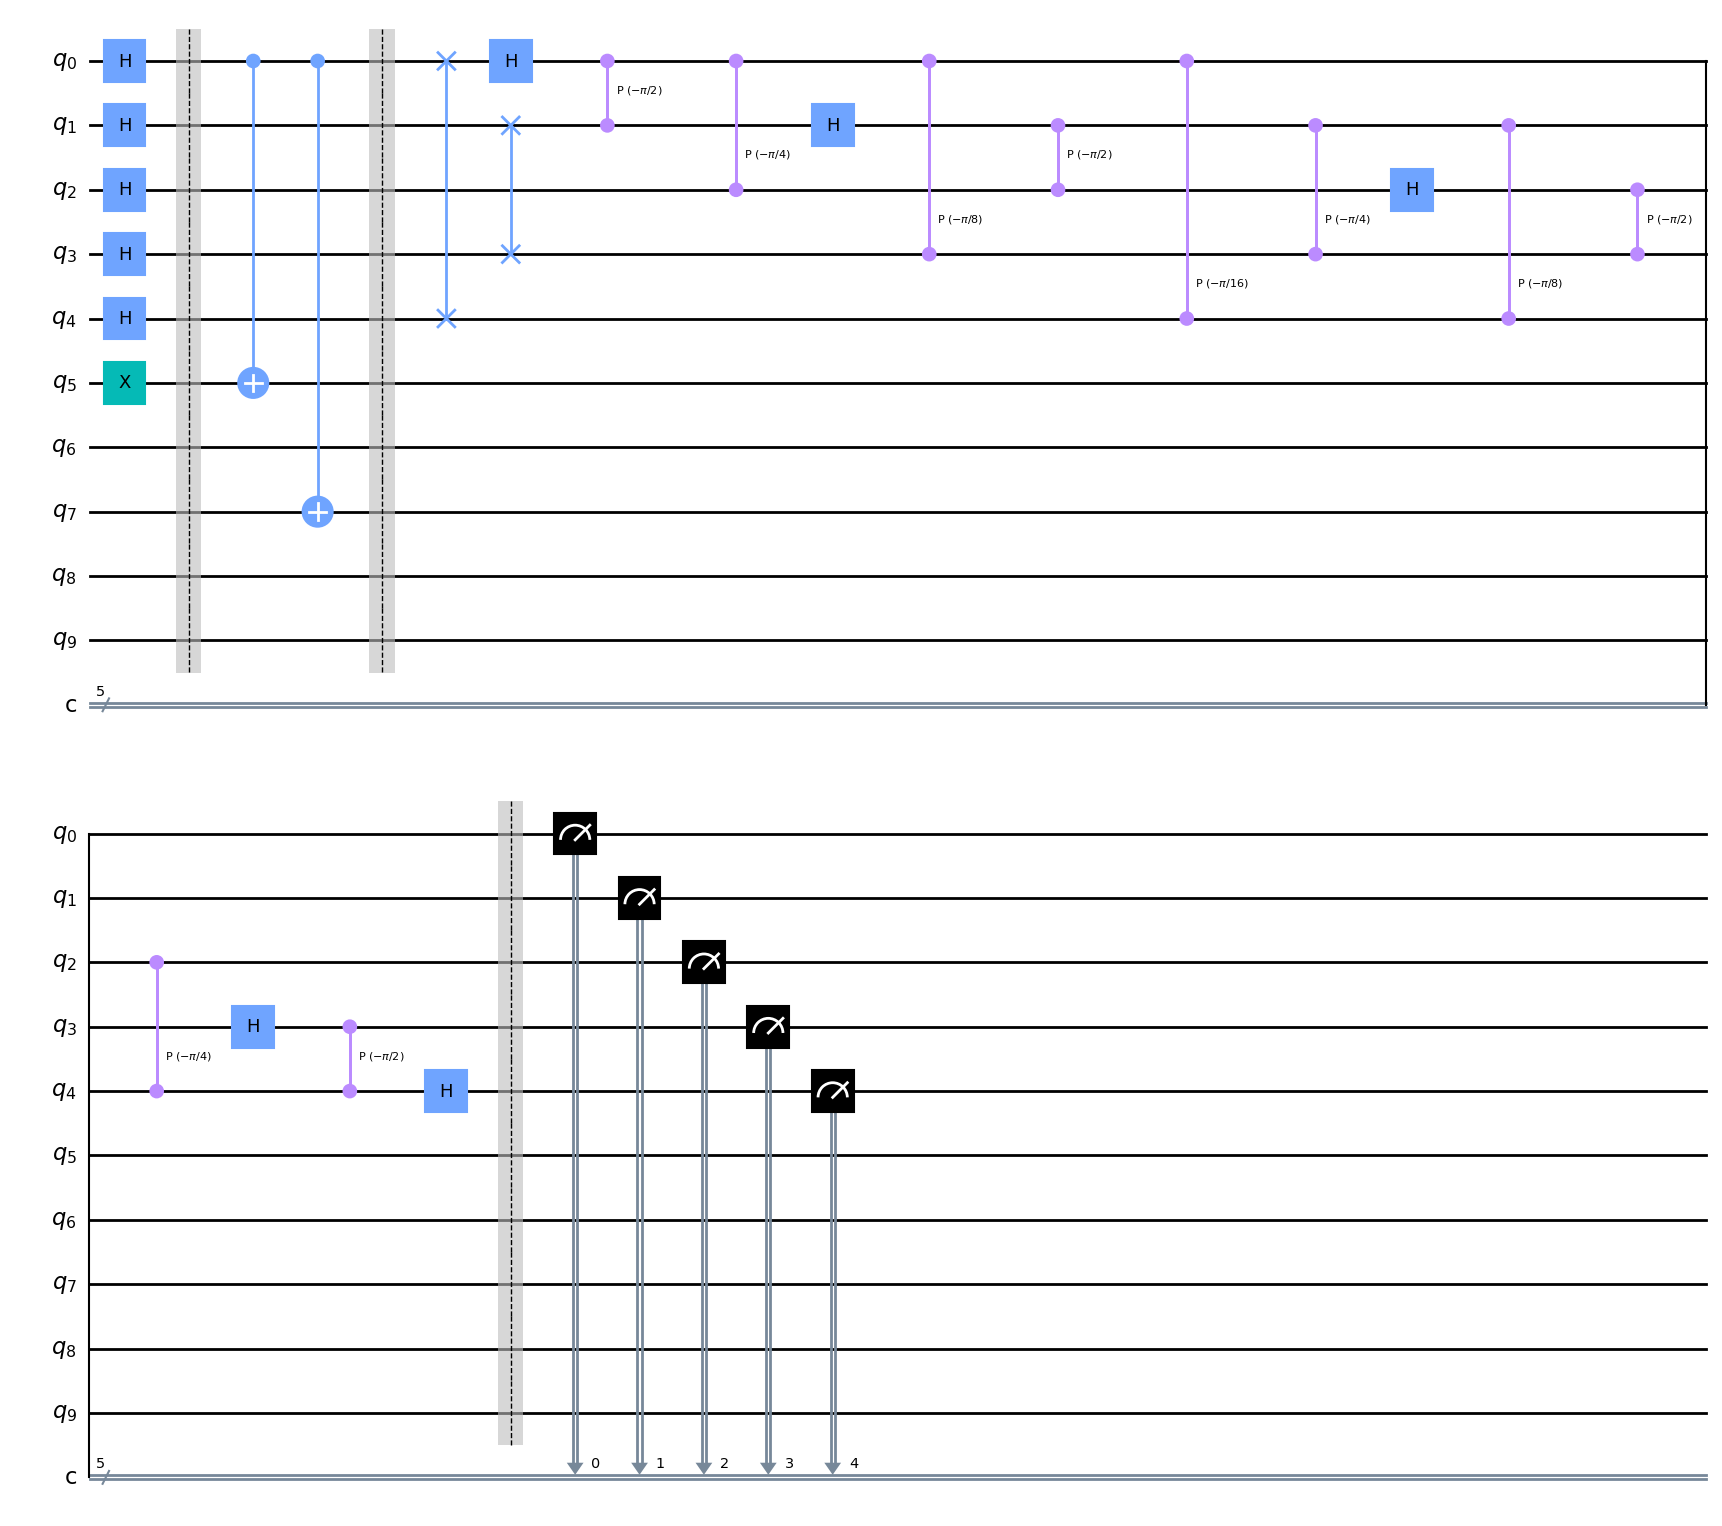

In [4]:
# 逆量子フーリエ変換を生成する関数
def inverse_qft(circuit, n):
    for i in range(n//2):
        circuit.swap(i, n-i-1)
    for i in range(n):
        circuit.h(i)
        for j in range(i+1, n):
            circuit.cp(-np.pi / float(2 ** (j - i)), j, i)

t = 5  #r <= 2^t? 
n = 5  #N < 2^n?
q = t + n #量子ビット数
c = t #古典ビット数

# 初期状態の構築
circ_init = QuantumCircuit(q, c)
for i in range(0, t):
    circ_init.h(i)
circ_init.x(t)

#位相推定ゲートを実装する回路
circ_p = QuantumCircuit(q, c)
circ_p.barrier()
circ_p.cx(0, 5)
circ_p.cx(0, 7)

#逆量子フーリエ変換を実装する回路
circ_iqft = QuantumCircuit(q, c)
circ_iqft.barrier()
inverse_qft(circ_iqft, t)

#測定部分
meas = QuantumCircuit(q, c)
meas.barrier()
for i in range(0, t):
    meas.measure([i], [i])
    
#回路を繋げる
qc = circ_init.compose(circ_p).compose(circ_iqft).compose(meas)

#回路を描画
qc.draw(output='mpl')


{'10000': 1050, '00000': 998}


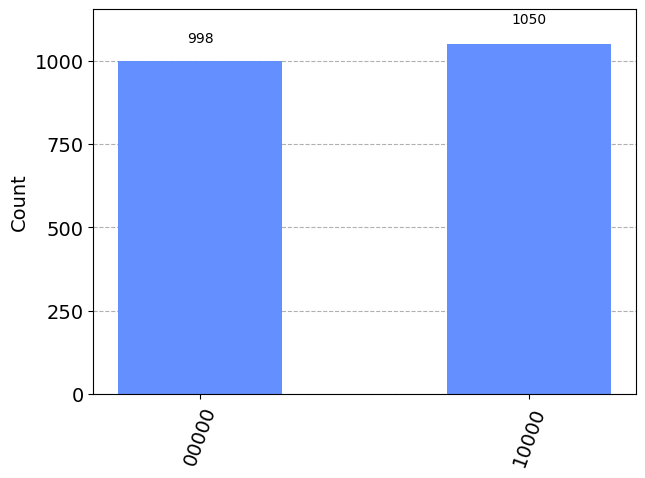

In [6]:
#シミュレータで試す
simulator = Aer.get_backend('qasm_simulator')

shots = 2048

job_sim = execute(qc, backend=simulator, shots=shots)
result_sim = job_sim.result().get_counts(qc)
print(result_sim)
plot_histogram(result_sim)